## Telecom Churn Case Study 
## Business Problem:
#  Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
## Objective :
To Predict the customers who are about to churn from a telecom operator
Business Objective is to predict the High Value Customers only
We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling)
Churn would be based on Usage Requirement

## Approach to Build model 
1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. create churn variable and remove unnecessary data columns

3. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

4. Derive new features.

5. Reduce the number of variables using PCA.

6. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

7. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

8. Finally, choose a model based on some evaluation metric.

## Importing required Libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## Loading Telecom Churn Dataset 

In [2]:
tele_churn = pd.read_csv("telecom_churn_data.csv")

In [3]:
# retaining original data to backup dataframe
org_tele_churn = tele_churn.copy(deep=True)

In [4]:
tele_churn.shape

(99999, 226)

In [5]:
tele_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",

In [6]:
tele_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
tele_churn.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

## Creating sub datasets based on data category 
1. ID columns
2. Date Columns
3. Category Columns
4. Numeric columns 

In [8]:
# Creating ID Columns 
ID_cols = ['mobile_number', 'circle_id']

In [9]:
ID_cols

['mobile_number', 'circle_id']

In [10]:
# Creating Date Columns
date_cols= ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9']

In [11]:
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [12]:
# Creating Category Columns 
cat_cols= [  'night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9']

In [13]:
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [14]:
num_cols = [column for column in tele_churn.columns if column not in ID_cols + date_cols + cat_cols]

In [15]:
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

## Pre-process data

In [16]:
# converting column names for (jun_vbc_3g, jul_vbc_3g, aug_vbc_3g, sep_vbc_3g) to (vbc_3g_6, vbc_3g_7, vbc_3g_8, vbc_3g_9)

In [17]:
tele_churn['vbc_3g_6'] = tele_churn['jun_vbc_3g']
tele_churn['vbc_3g_7'] = tele_churn['jul_vbc_3g']
tele_churn['vbc_3g_8'] = tele_churn['aug_vbc_3g']
tele_churn['vbc_3g_9'] = tele_churn['sep_vbc_3g']

# updating num_cols
num_cols.remove('jun_vbc_3g')
num_cols.remove('jul_vbc_3g')
num_cols.remove('aug_vbc_3g')
num_cols.remove('sep_vbc_3g')
num_cols.append('vbc_3g_6')
num_cols.append('vbc_3g_7')
num_cols.append('vbc_3g_8')
num_cols.append('vbc_3g_9')

tele_churn.drop(['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

In [18]:
tele_churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8', 'vbc_3g_9'],
      dtype='object', length=226)

In [19]:
tele_churn.shape

(99999, 226)

#### removing unnecessary columns

In [20]:
# circle_id is same for all the data
tele_churn.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

In [21]:
# removing circle_id column data
tele_churn.drop('circle_id', axis=1, inplace=True)

# updating ID cols
ID_cols.remove('circle_id')

#### checking for missing values

In [22]:
# function to check missing percentage with min_val % included
def cal_missing_percent(df, min_val = 0, sort=False, asc=True):
    df_per = (df.isnull().sum() * 100) / len(df)
    if sort == True:
        return df_per[df_per >= min_val].sort_values(ascending = asc)
    else:
        return df_per[df_per >= min_val]

In [23]:
# look at missing value ratio in each column 
cal_missing_percent(tele_churn)

mobile_number               0.00
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
last_date_of_month_6        0.00
last_date_of_month_7        0.60
last_date_of_month_8        1.10
last_date_of_month_9        1.66
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t_mou_7            3.86
loc_og_t2t

##### Imputing misisng values of categorical columns

In [24]:
# check misisng values of categorical columns

# Creating Category Columns data
cal_missing_percent(tele_churn[cat_cols])

night_pck_user_6   74.85
night_pck_user_7   74.43
night_pck_user_8   73.66
night_pck_user_9   74.08
fb_user_6          74.85
fb_user_7          74.43
fb_user_8          73.66
fb_user_9          74.08
dtype: float64

In [25]:
## imputing categorical columns with -1
tele_churn[cat_cols] = tele_churn[cat_cols].apply(lambda x: x.fillna(-1))


In [26]:
# checking after imputing null values
cal_missing_percent(tele_churn[cat_cols])

night_pck_user_6   0.00
night_pck_user_7   0.00
night_pck_user_8   0.00
night_pck_user_9   0.00
fb_user_6          0.00
fb_user_7          0.00
fb_user_8          0.00
fb_user_9          0.00
dtype: float64

##### checking data for missing values after imputing

In [27]:
cal_missing_percent(tele_churn, sort=True, asc=False)

arpu_3g_6                  74.85
av_rech_amt_data_6         74.85
total_rech_data_6          74.85
max_rech_data_6            74.85
count_rech_2g_6            74.85
count_rech_3g_6            74.85
date_of_last_rech_data_6   74.85
arpu_2g_6                  74.85
total_rech_data_7          74.43
max_rech_data_7            74.43
av_rech_amt_data_7         74.43
arpu_2g_7                  74.43
date_of_last_rech_data_7   74.43
count_rech_2g_7            74.43
count_rech_3g_7            74.43
arpu_3g_7                  74.43
arpu_3g_9                  74.08
total_rech_data_9          74.08
count_rech_2g_9            74.08
arpu_2g_9                  74.08
max_rech_data_9            74.08
date_of_last_rech_data_9   74.08
count_rech_3g_9            74.08
av_rech_amt_data_9         74.08
total_rech_data_8          73.66
arpu_3g_8                  73.66
date_of_last_rech_data_8   73.66
max_rech_data_8            73.66
arpu_2g_8                  73.66
av_rech_amt_data_8         73.66
count_rech

In [28]:
# we can see recharge columns and ARPU columns has more null values 

In [29]:
# getting recharge columns and arpu columns
rech_cols = tele_churn[num_cols].filter(regex='rech.*', axis=1).columns
arpu_cols = tele_churn[num_cols].filter(regex='arpu.*', axis=1).columns

In [30]:
tele_churn[rech_cols].head(5)
tele_churn[arpu_cols].head(5)

,arpu_6,arpu_7,arpu_8,arpu_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
0,197.38,214.82,213.80,21.10,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN
1,34.05,355.07,268.32,86.28,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN
2,167.69,189.06,210.23,290.71,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.00
3,221.34,251.10,508.05,389.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,261.64,309.88,238.17,163.43,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN


In [31]:
# getting misisng vlaues percentage

cal_missing_percent(tele_churn[rech_cols], sort=True)
cal_missing_percent(tele_churn[arpu_cols], sort=True)

arpu_6       0.00
arpu_7       0.00
arpu_8       0.00
arpu_9       0.00
arpu_3g_8   73.66
arpu_2g_8   73.66
arpu_3g_9   74.08
arpu_2g_9   74.08
arpu_3g_7   74.43
arpu_2g_7   74.43
arpu_3g_6   74.85
arpu_2g_6   74.85
dtype: float64

In [32]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge

tele_churn.loc[(tele_churn.total_rech_data_6.isnull() & tele_churn.date_of_last_rech_data_6.isnull() & tele_churn.count_rech_2g_6.isnull() & tele_churn.arpu_3g_6.isnull() & tele_churn.arpu_2g_6.isnull() &
                tele_churn.total_rech_data_7.isnull() & tele_churn.date_of_last_rech_data_7.isnull() & tele_churn.count_rech_2g_7.isnull() & tele_churn.arpu_3g_7.isnull() & tele_churn.arpu_2g_7.isnull() &
                tele_churn.total_rech_data_8.isnull() & tele_churn.date_of_last_rech_data_8.isnull() & tele_churn.count_rech_2g_8.isnull() & tele_churn.arpu_3g_8.isnull() & tele_churn.arpu_2g_8.isnull() &
                tele_churn.total_rech_data_9.isnull() & tele_churn.date_of_last_rech_data_9.isnull() & tele_churn.count_rech_2g_9.isnull() & tele_churn.arpu_3g_9.isnull() & tele_churn.arpu_2g_9.isnull())
               , ["total_rech_data_6", "date_of_last_rech_data_6", "count_rech_2g_6", "arpu_3g_6", "arpu_2g_6"
                  , "total_rech_data_7", "date_of_last_rech_data_7", "count_rech_2g_7", "arpu_3g_7", "arpu_2g_7"
                  , "total_rech_data_8", "date_of_last_rech_data_8", "count_rech_2g_8", "arpu_3g_8", "arpu_2g_8"
                  , "total_rech_data_9", "date_of_last_rech_data_9", "count_rech_2g_9", "arpu_3g_9", "arpu_2g_9"]].head(5)

,total_rech_data_6,date_of_last_rech_data_6,count_rech_2g_6,arpu_3g_6,arpu_2g_6,total_rech_data_7,date_of_last_rech_data_7,count_rech_2g_7,arpu_3g_7,arpu_2g_7,total_rech_data_8,date_of_last_rech_data_8,count_rech_2g_8,arpu_3g_8,arpu_2g_8,total_rech_data_9,date_of_last_rech_data_9,count_rech_2g_9,arpu_3g_9,arpu_2g_9
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# imputing rech columns missing values as 0 since the nan recharge amount can be considered as no recharge done.

tele_churn[rech_cols] = tele_churn[rech_cols].apply(lambda x: x.fillna(0))
tele_churn[arpu_cols] = tele_churn[arpu_cols].apply(lambda x: x.fillna(0))

In [34]:
tele_churn[rech_cols].head(5)
tele_churn[arpu_cols].head(5)

,arpu_6,arpu_7,arpu_8,arpu_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
0,197.38,214.82,213.80,21.10,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00
1,34.05,355.07,268.32,86.28,0.00,0.00,0.00,0.00,0.00,28.61,7.60,0.00
2,167.69,189.06,210.23,290.71,0.00,0.00,0.00,2.84,0.00,0.00,0.00,0.00
3,221.34,251.10,508.05,389.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,261.64,309.88,238.17,163.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [35]:
# calculating percentages after imputing rech columns

cal_missing_percent(tele_churn[rech_cols])
cal_missing_percent(tele_churn[arpu_cols])

arpu_6      0.00
arpu_7      0.00
arpu_8      0.00
arpu_9      0.00
arpu_3g_6   0.00
arpu_3g_7   0.00
arpu_3g_8   0.00
arpu_3g_9   0.00
arpu_2g_6   0.00
arpu_2g_7   0.00
arpu_2g_8   0.00
arpu_2g_9   0.00
dtype: float64

##### calculating missing values after imputing rech and arpu columns

In [36]:
cal_missing_percent(tele_churn, min_val=0.01, sort=True, asc=False)

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_9   74.08
date_of_last_rech_data_8   73.66
loc_ic_t2m_mou_9            7.75
loc_og_t2c_mou_9            7.75
loc_og_mou_9                7.75
std_og_t2t_mou_9            7.75
std_og_t2m_mou_9            7.75
std_og_t2f_mou_9            7.75
std_og_t2c_mou_9            7.75
std_og_mou_9                7.75
spl_og_mou_9                7.75
og_others_9                 7.75
loc_ic_t2t_mou_9            7.75
loc_ic_mou_9                7.75
loc_ic_t2f_mou_9            7.75
loc_og_t2m_mou_9            7.75
std_ic_t2t_mou_9            7.75
std_ic_t2m_mou_9            7.75
std_ic_t2f_mou_9            7.75
std_ic_t2o_mou_9            7.75
std_ic_mou_9                7.75
spl_ic_mou_9                7.75
isd_ic_mou_9                7.75
ic_others_9                 7.75
loc_og_t2f_mou_9            7.75
isd_og_mou_9                7.75
roam_ic_mou_9               7.75
offnet_mou_9                7.75
roam_og_mo

##### checking missing values for mou columns 

In [37]:
mou_cols = tele_churn[num_cols].filter(regex="mou.*", axis=1).columns

In [38]:
cal_missing_percent(tele_churn[mou_cols], sort=True, asc=False)

isd_ic_mou_9       7.75
std_og_t2t_mou_9   7.75
loc_og_t2m_mou_9   7.75
std_ic_t2m_mou_9   7.75
loc_og_t2f_mou_9   7.75
loc_og_t2c_mou_9   7.75
std_ic_t2t_mou_9   7.75
loc_og_mou_9       7.75
loc_ic_mou_9       7.75
std_og_t2m_mou_9   7.75
loc_og_t2t_mou_9   7.75
loc_ic_t2f_mou_9   7.75
std_og_t2f_mou_9   7.75
loc_ic_t2m_mou_9   7.75
std_og_t2c_mou_9   7.75
std_og_mou_9       7.75
loc_ic_t2t_mou_9   7.75
isd_og_mou_9       7.75
std_ic_t2f_mou_9   7.75
spl_og_mou_9       7.75
offnet_mou_9       7.75
onnet_mou_9        7.75
roam_ic_mou_9      7.75
std_ic_t2o_mou_9   7.75
spl_ic_mou_9       7.75
std_ic_mou_9       7.75
roam_og_mou_9      7.75
std_og_t2c_mou_8   5.38
spl_ic_mou_8       5.38
isd_og_mou_8       5.38
loc_ic_t2f_mou_8   5.38
offnet_mou_8       5.38
std_og_t2m_mou_8   5.38
loc_ic_t2t_mou_8   5.38
onnet_mou_8        5.38
loc_ic_mou_8       5.38
loc_og_t2t_mou_8   5.38
std_og_t2t_mou_8   5.38
std_og_t2f_mou_8   5.38
std_ic_mou_8       5.38
std_og_mou_8       5.38
loc_og_mou_8    

In [39]:
tele_churn[mou_cols].head(5)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9
0,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN
1,0.00,0.00,0.00,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00
2,0.00,0.00,0.00,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.00,0.00,0.00,0.00,0.00,47.64,108.68,120.94,18.04,0.00,0.00,0.00,0.00,46.56,236.84,96.84,42.08,155.33,412.94,285.46,124.94,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,0.00,0.00,0.00,0.00,139.33,306.66,239.03,171.49,370.04,519.53,395.03,517.74,0.21,0.00,0.00,0.45,0.00,0.85,0.00,0.01
3,0.00,0.00,0.00,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,0.00,0.00,0.00,0.00,0.

##### filling missing values for mou columns as 0. Asusming minutes of usage will be 0 for nan's

In [40]:
tele_churn[mou_cols] = tele_churn[mou_cols].apply(lambda x: x.fillna(0))

In [41]:
# calculating missing values after imputing mou columns
cal_missing_percent(tele_churn, sort=True, asc=False)

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_9   74.08
date_of_last_rech_data_8   73.66
og_others_9                 7.75
ic_others_9                 7.75
ic_others_8                 5.38
og_others_8                 5.38
date_of_last_rech_9         4.76
ic_others_6                 3.94
og_others_6                 3.94
og_others_7                 3.86
ic_others_7                 3.86
date_of_last_rech_8         3.62
date_of_last_rech_7         1.77
last_date_of_month_9        1.66
date_of_last_rech_6         1.61
last_date_of_month_8        1.10
last_date_of_month_7        0.60
last_day_rch_amt_6          0.00
mobile_number               0.00
last_day_rch_amt_9          0.00
last_day_rch_amt_7          0.00
last_day_rch_amt_8          0.00
max_rech_amt_8              0.00
total_rech_data_6           0.00
total_rech_data_7           0.00
total_rech_data_8           0.00
total_rech_data_9           0.00
max_rech_data_6             0.00
max_rech_d

##### dropping date columns

In [42]:
# dropping date columns
tele_churn.drop(date_cols, axis = 1, inplace=True)

In [43]:
# calculating missing percentages afeter removing date cols
cal_missing_percent(tele_churn, sort=True, asc=False)

og_others_9          7.75
ic_others_9          7.75
og_others_8          5.38
ic_others_8          5.38
ic_others_6          3.94
og_others_6          3.94
og_others_7          3.86
ic_others_7          3.86
mobile_number        0.00
last_day_rch_amt_6   0.00
max_rech_amt_6       0.00
max_rech_amt_7       0.00
max_rech_amt_8       0.00
max_rech_amt_9       0.00
last_day_rch_amt_7   0.00
total_rech_amt_8     0.00
last_day_rch_amt_8   0.00
last_day_rch_amt_9   0.00
total_rech_data_6    0.00
total_rech_data_7    0.00
total_rech_data_8    0.00
total_rech_data_9    0.00
max_rech_data_6      0.00
max_rech_data_7      0.00
max_rech_data_8      0.00
max_rech_data_9      0.00
count_rech_2g_6      0.00
count_rech_2g_7      0.00
total_rech_amt_9     0.00
total_rech_amt_6     0.00
total_rech_amt_7     0.00
std_ic_t2o_mou_7     0.00
std_ic_t2o_mou_9     0.00
std_ic_mou_6         0.00
std_ic_mou_7         0.00
std_ic_mou_8         0.00
std_ic_mou_9         0.00
total_ic_mou_6       0.00
total_ic_mou

In [44]:
# remaining columns
othr_cols = ['ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9']

##### imputing remaining columns

In [45]:
tele_churn[othr_cols].describe()

,ic_others_6,ic_others_7,ic_others_8,ic_others_9,og_others_6,og_others_7,og_others_8,og_others_9
count,"96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00"
mean,0.85,1.01,0.97,1.02,0.45,0.03,0.03,0.05
std,11.96,12.67,13.28,12.38,4.13,2.16,2.32,3.64
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"1,362.94","1,495.94","2,327.51","1,005.23",800.89,370.13,394.93,787.79


##### imputing remaining columns with 0 as they can be considered as no calls

In [46]:
tele_churn[othr_cols] = tele_churn[othr_cols].apply(lambda x: x.fillna(0))

#### checking missing percentages

In [47]:
cal_missing_percent(tele_churn)

mobile_number        0.00
loc_og_t2o_mou       0.00
std_og_t2o_mou       0.00
loc_ic_t2o_mou       0.00
arpu_6               0.00
arpu_7               0.00
arpu_8               0.00
arpu_9               0.00
onnet_mou_6          0.00
onnet_mou_7          0.00
onnet_mou_8          0.00
onnet_mou_9          0.00
offnet_mou_6         0.00
offnet_mou_7         0.00
offnet_mou_8         0.00
offnet_mou_9         0.00
roam_ic_mou_6        0.00
roam_ic_mou_7        0.00
roam_ic_mou_8        0.00
roam_ic_mou_9        0.00
roam_og_mou_6        0.00
roam_og_mou_7        0.00
roam_og_mou_8        0.00
roam_og_mou_9        0.00
loc_og_t2t_mou_6     0.00
loc_og_t2t_mou_7     0.00
loc_og_t2t_mou_8     0.00
loc_og_t2t_mou_9     0.00
loc_og_t2m_mou_6     0.00
loc_og_t2m_mou_7     0.00
loc_og_t2m_mou_8     0.00
loc_og_t2m_mou_9     0.00
loc_og_t2f_mou_6     0.00
loc_og_t2f_mou_7     0.00
loc_og_t2f_mou_8     0.00
loc_og_t2f_mou_9     0.00
loc_og_t2c_mou_6     0.00
loc_og_t2c_mou_7     0.00
loc_og_t2c_m

#### chekcing data types

In [48]:
tele_churn.dtypes

mobile_number           int64
loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2m_mou_9      float64
loc_og_t2f_mou_6      float64
loc_og_t2f

##### As we can see all columns are of numerical type..


#### removing id columns as they are not needed for models

In [49]:
tele_churn.drop(ID_cols, axis= 1, inplace=True)

In [50]:
tele_churn.shape

(99999, 212)

## Creating churn column

In [51]:
# churn column can be identified by the total ic, og and data usage of 9th month
# churn customer will be 1 and 0 will be non-churn customer

tele_churn['churn'] = (tele_churn[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0).astype(int)

In [52]:
tele_churn.churn.value_counts()

0    89808
1    10191
Name: churn, dtype: int64

In [53]:
# dropping 9 month columns as they are not required anymore
churn_cols = tele_churn.filter(regex="_9.*").columns

In [54]:
# dropping chiurn phase columns

tele_churn.drop(churn_cols, axis=1, inplace=True)

In [55]:
tele_churn.shape


(99999, 161)

## filtering high value customers

To identify High-value customer, we need data of total recharge amount spent by a user per month..

To do this, we will calculate total amount spent.

Total amount will be sum of total recharge amount (calls) + total data amount (2G, 3G)

To calculate total data recharge amount of a user per month, we will do as follows:
<br />
(Total number of data recharges) * (average data recharge) will give total data recharge per month

In [56]:
tele_churn.head(5)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_6,vbc_3g_7,vbc_3g_8,churn
0,0.00,0.00,0.00,197.38,214.82,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.00,1.00,1.00,252.00,252.00,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.00,0.00,0.00,0,0,0,0,0,0,1,1,1,0,0,0,1.00,1.00,1.00,968,101.20,0.00,30.40,1
1,0.00,0.00,0.00,34.05,355.07,268.32,24.11,78.68,7.68,15.74,99.84,304.76,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.00,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,4.68,23.43,12.76,0.00,0.00,0.00,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.00,0.00,0.00,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,4,9,11,74,384,283,44,154,65,44,23,30,0.00,1.00,2.00,0.00,154.00,25.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,154.00,50.00,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.61,7.60,-1.00,0.00,0.00,0,1,0,0,0,2,0,0,0,0,0,0,-1.00,1.00,1.00,1006,0.00,0.00,0.00,0
2,0.00,0.00,0.00,167.69,189.06,210.23,11.54,55.24,37.26,143.33,220.59,208.36,0.00,0

In [57]:
total_rech_amt_cols = ['total_rech_amt_6', 'total_rech_amt_7']

In [58]:
# calculating total data amount

tele_churn['total_rech_amt_data_6'] = tele_churn['total_rech_data_6'] * tele_churn['av_rech_amt_data_6']
tele_churn['total_rech_amt_data_7'] = tele_churn['total_rech_data_7'] * tele_churn['av_rech_amt_data_7']

In [59]:
# calculating total amount usage

tele_churn['total_amt_6'] = tele_churn['total_rech_amt_6'] + tele_churn['total_rech_amt_data_6']
tele_churn['total_amt_7'] = tele_churn['total_rech_amt_7'] + tele_churn['total_rech_amt_data_7']

##### now, we have total usage of each customer.
To identify high-value cutomers, we look at 70th percentile and users usage greator than or equal to 70th percentile will be high-value customers

In [60]:
tele_churn[['total_amt_6','total_amt_7']]

,total_amt_6,total_amt_7
0,614.00,504.00
1,74.00,538.00
2,168.00,315.00
3,230.00,310.00
4,252.00,350.00
...,...,...
99994,60.00,110.00
99995,110.00,110.00
99996,197.00,0.00
99997,"2,130.00","1,074.00"


In [61]:
# calculating average amount
tele_churn['av_amt'] = (tele_churn['total_amt_6'] + tele_churn['total_amt_7'])/2

In [62]:
# calculating 70 quantile value and above rows

tele_churn.loc[tele_churn['av_amt'] >= tele_churn['av_amt'].quantile(0.7), :]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_6,vbc_3g_7,vbc_3g_8,churn,total_rech_amt_data_6,total_rech_amt_data_7,total_amt_6,total_amt_7,av_amt
0,0.00,0.00,0.00,197.38,214.82,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.00,1.00,1.00,252.00,252.00,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.00,0.00,0.00,0,0,0,0,0,0,1,1,1,0,0,0,1.00,1.00,1.00,968,101.20,0.00,30.40,1,252.00,252.00,614.00,504.00,559.00
7,0.00,0.00,0.00,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.00,0.00,0.00,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [63]:
high_cust_churn = tele_churn.loc[tele_churn['av_amt'] >= tele_churn['av_amt'].quantile(0.7), :]

##### __high_cust_churn__ will be the filtered data frame we will be using further for our analysis

## EDA

#### checking basic statistics of the data

In [64]:
high_cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 166 entries, loc_og_t2o_mou to av_amt
dtypes: float64(140), int32(1), int64(25)
memory usage: 38.1 MB


In [65]:
high_cust_churn.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_6,vbc_3g_7,vbc_3g_8,churn,total_rech_amt_data_6,total_rech_amt_data_7,total_amt_6,total_amt_7,av_amt
count,"30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00"

In [66]:
high_cust_churn.shape

(30001, 166)

In [67]:
high_cust_churn.dtypes

loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64
loc_og_mou

In [68]:
high_cust_churn.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'aon', 'vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8', 'churn',
       'total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_amt_6',
       'total_amt_7', 'av_amt'],
      dtype='object', length=166)

#### checking the data distribution of churn column

In [69]:
high_cust_churn.churn.describe()

count   30,001.00
mean         0.08
std          0.27
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: churn, dtype: float64

In [70]:
high_cust_churn.churn.value_counts(1)

0   0.92
1   0.08
Name: churn, dtype: float64

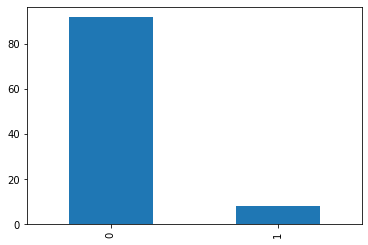

In [71]:
# creating bar plot for the churn column
(high_cust_churn.churn.value_counts(1)*100).plot(kind='bar')
plt.show();

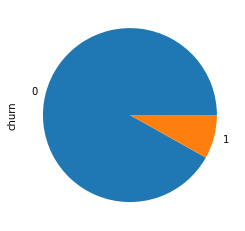

In [72]:
# creating pie plot for the churn column
(high_cust_churn.churn.value_counts(1)*100).plot(kind='pie')
plt.show();

#### creating correlation matrix will consume huge resource because of high features.. We can check correlation after PCA

## univariate analysis

#### analysis on arpu columns

In [73]:
# all arpu cols are continuous variables
arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']

In [74]:
def drawBoxPlots(df, x_col, y_col, subplot_x=10, subplot_y=3, figsize_x=20, figsiz_y = 40):
    plt.figure(figsize=(figsize_x, figsiz_y))

    i = 1
    for col in y_col:
        plt.subplot(subplot_x, subplot_y, i)
        sns.boxplot(data=df, x=x_col, y=col)
        i+=1

    plt.show();

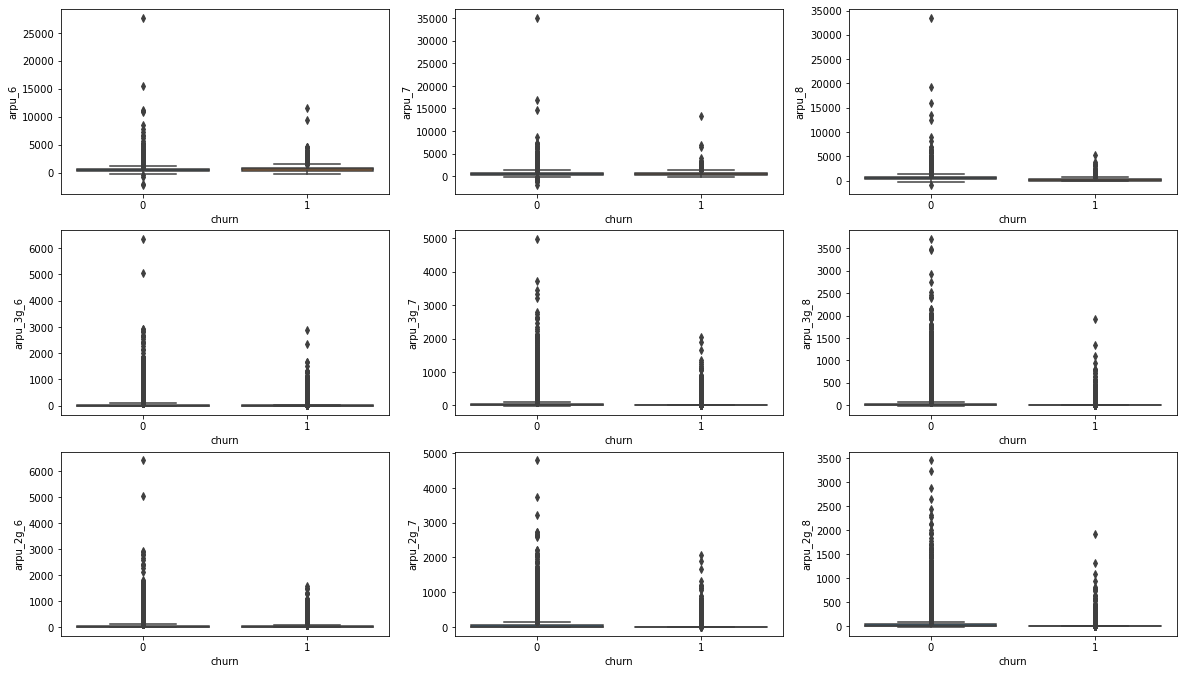

In [75]:
drawBoxPlots(high_cust_churn, 'churn', arpu_cols)

In [76]:
# we can see a large number of outliers present in all arpu cols

#### analysis on mou cols

In [77]:
total_mou_cols = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']

In [78]:
high_cust_churn[total_mou_cols].describe()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,"30,001.00","30,001.00","30,001.00","30,001.00","30,001.00","30,001.00"
mean,289.95,296.76,279.92,609.87,628.37,551.68
std,365.52,373.75,361.18,690.87,717.22,700.48
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,72.88,78.99,61.36,116.58,116.49,72.36
50%,183.73,187.58,173.11,410.63,425.59,333.54
75%,371.99,377.31,361.73,858.76,891.44,774.78
max,"7,716.14","7,442.86","6,066.63","10,674.03","11,365.31","14,043.06"


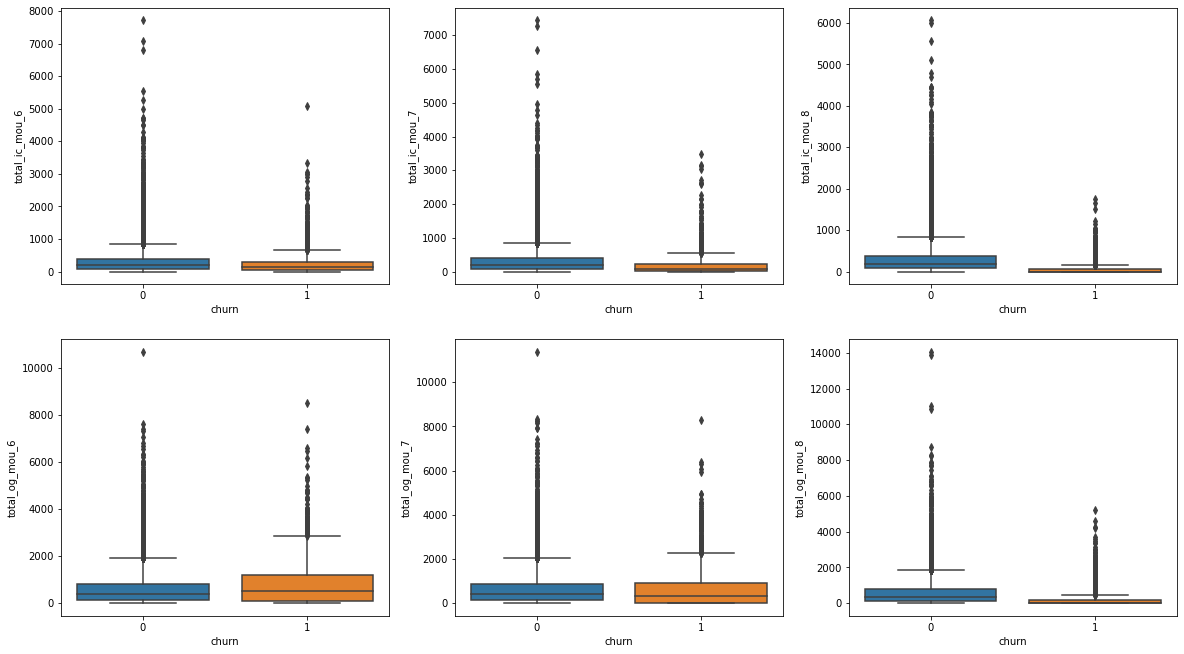

In [79]:
drawBoxPlots(high_cust_churn, 'churn', total_mou_cols, figsiz_y=60)

## Bivariate analysis

In [80]:
# scatter plots between above columns

In [81]:
def drawCorrPlot(corr_mat, figsize_x=7, figsiz_y = 15):
    plt.figure(figsize=(figsize_x, figsiz_y))
    # creating a mask to print only onme half of the heatmap
    mask = np.zeros_like(corr_mat)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(corr_mat, annot=True, linewidths=0.5, center=0, mask=mask, vmax=.3, square=True,
                cbar_kws = dict(use_gridspec=False,location="top"))
    plt.show()

#### correlation for arpu cols

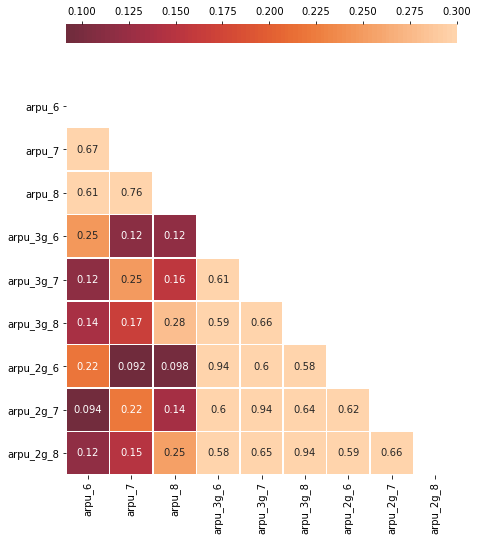

In [82]:
drawCorrPlot(high_cust_churn[arpu_cols].corr())

we can see there are some highly correlated features between arpu columns

#### correlations for mou cols

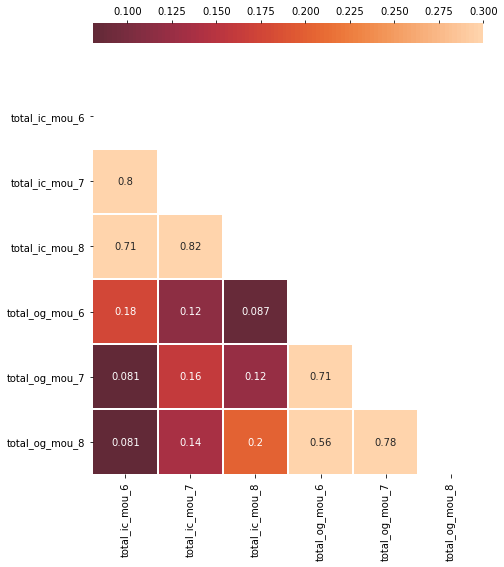

In [83]:
drawCorrPlot(high_cust_churn[total_mou_cols].corr())

#### removing outliers

In [84]:
high_cust_churn.shape

(30001, 166)

In [85]:
def quantile_percentage(data):  
    quantile = pd.DataFrame(columns=['col', '10','50','85','90','95','99','100','max'])
    for col in data.columns:
        _tmp = data[col].quantile([0.1,0.5,0.85,0.9,0.95,0.99,1.0])
        quantile = quantile.append({'col': col, 
                                    '10': str(round(_tmp[0.1],2)), 
                                    '50': str(round(_tmp[0.5],2)),
                                    '85': str(round(_tmp[0.85],2)),
                                    '90': str(round(_tmp[0.9],2)),
                                    '95': str(round(_tmp[0.95],2)),
                                    '99': str(round(_tmp[0.99],2)),
                                    '100': str(round(_tmp[1.0],2)),
                                   'max':max(data[col])}, ignore_index=True)
    return quantile

In [86]:
quantile_percentage(high_cust_churn)

,col,10,50,85,90,95,99,100,max
0,loc_og_t2o_mou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,std_og_t2o_mou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,loc_ic_t2o_mou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,arpu_6,171.6,481.69,860.9,994.1,1240.96,1985.12,27731.09,"27,731.09"
4,arpu_7,177.89,480.94,860.0,995.86,1261.27,1999.5,35145.83,"35,145.83"
5,arpu_8,84.0,427.58,833.3,977.34,1255.02,1986.62,33543.62,"33,543.62"
6,onnet_mou_6,0.7,84.58,530.63,754.16,1135.44,2151.74,7376.71,"7,376.71"
7,onnet_mou_7,0.58,82.81,549.61,784.48,1185.79,2201.96,8157.78,"8,157.78"
8,onnet_mou_8,0.0,65.61,451.88,665.08,1074.59,2159.11,10752.56,"10,752.56"
9,offnet_mou_6,11.26,222.54,709.61,895.83,1256.61,2326.36,8362.36,"8,362.36"


In [87]:
Q1 = high_cust_churn.quantile(0.05)
Q3 = high_cust_churn.quantile(0.99)
IQR = Q3 - Q1

high_cust_churn = high_cust_churn[~((high_cust_churn < (Q1 - 1.5 * IQR)) |(high_cust_churn > (Q3 + 1.5 * IQR))).any(axis=1)]

In [88]:
high_cust_churn.shape

(27527, 166)

##### after removing outliers we got around 27K rows

### x and y split

In [89]:
X1 = high_cust_churn.copy()
y1 = X1.pop('churn')

### test train split

In [90]:
# test and train split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 42, stratify = y1)

### Scaling data using standard scalar

In [91]:
scalar1 = StandardScaler()

In [92]:
# fit_transform of X trian data set and transform of test data set
arr_train_X1 = scalar1.fit_transform(X1_train)
arr_test_X1 = scalar1.transform(X1_test)

In [94]:
# converting ndarray to dataframe
df_train_X1 = pd.DataFrame(arr_train_X1, columns = X1.columns)
df_test_X1 = pd.DataFrame(arr_test_X1, columns = X1.columns)

In [95]:
df_train_y1 = list(y1_train)
df_test_y1 = list(y1_test)

### Building model for determining most important features for predictions

In [96]:
import statsmodels.api as sm

In [97]:
# Logistic regression model
logm1 = sm.GLM(df_train_y1, (sm.add_constant(df_train_X1)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21878
Model Family:                Binomial   Df Model:                          142
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3786.4
Date:                Thu, 01 Jul 2021   Deviance:                       7572.8
Time:                        02:42:48   Pearson chi2:                 1.23e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.0492      0.068    -59.526      0.000      -4.183      -3.916
loc_og_t2o_mou        -1.104e-07   9.02e-08     -1.224      0.221   -2.87e-07    6.64e-08
std_og_t2o_mou        -1.818e-07   1.67e-07     -1.090      0.276   -5.09e-07    1.45e-07
loc_ic_t2o_mou        -1.879e-08   2.12e-07     -0.088      0.930   -4.35e-07    3.98e-07
arpu_6                    0.0727      0.089      0.817      0.414      -0.102       0.247
arpu_7                    0.0641      0.107      0.600      0.548      -0.145       0.273
arpu_8                    0.4375      0.147      2.986      0.003       0.150       0.725
onnet_mou_6              10.1882      4.153      2.453      0.014       2.048      18.329
onnet_mou_7              -1.6166      3.034     -0.533      0.594      -7.564       4.330
onnet_mou_8              -1.2644      3.949     -0.320      0.749      -9.004       6.475
offnet_mou_6             11.7332      4.477      2.621      0.009       2.958      20.508
offnet_mou_7             -1.9395      3.248     -0.597      0.550      -8.306       4.427
offnet_mou_8             -2.4086      4.181     -0.576      0.565     -10.604       5.786
roam_ic_mou_6            -0.0265      0.047     -0.566      0.572      -0.118       0.065
roam_ic_mou_7             0.0986      0.040      2.435      0.015       0.019       0.178
roam_ic_mou_8            -0.1001      0.037     -2.673      0.008      -0.174      -0.027
roam_og_mou_6            -2.1538      0.879     -2.451      0.014      -3.876      -0.432
roam_og_mou_7             0.2833      0.498      0.569      0.569      -0.693       1.260
roam_og_mou_8             0.3264      0.645      0.506      0.613      -0.937       1.590
loc_og_t2t_mou_6        571.8243    974.051      0.587      0.557   -1337.280    2480.928
loc_og_t2t_mou_7        459.9967    980.129      0.469      0.639   -1461.021    2381.015
loc_og_t2t_mou_8       4154.0540   1030.735      4.030      0.000    2133.850    6174.258
loc_og_t2m_mou_6        773.4157   1318.262      0.587      0.557   -1810.331    3357.163
loc_og_t2m_mou_7        611.9110   1303.699      0.469      0.639   -1943.292    3167.114
loc_og_t2m_mou_8       5821.8312   1444.463      4.030      0.000    2990.736    8652.927
loc_og_t2f_mou_6         50.3630     85.845      0.587      0.557    -117.891     218.617
loc_og_t2f_mou_7         40.9787     87.535      0.468      0.640    -130.586     212.543
loc_og_t2f_mou_8        378.4291     93.857      4.032      0.000     194.473     562.385
loc_og_t2c_mou_6         -0.0795      0.038     -2.103      0.035      -0.154      -0.005
loc_og_t2c_mou_7          0.0272      0.042      0.653      0.513      -0.054       0.109
loc_og_t2c_mou_8          0.0323      0.051      0.633      0.527      -0.068       0.132
loc_og_mou_6          -

#### Feature Selection Using RFE

In [98]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [99]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(df_train_X1, df_train_y1)

D:\users\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\u

D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\u

D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\u

D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\u

D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\u

D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\u

D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\u

D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\u

In [100]:
rfe.support_

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [103]:
list(zip(df_train_X1.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 151),
 ('std_og_t2o_mou', False, 150),
 ('loc_ic_t2o_mou', False, 149),
 ('arpu_6', False, 10),
 ('arpu_7', False, 79),
 ('arpu_8', False, 27),
 ('onnet_mou_6', False, 67),
 ('onnet_mou_7', False, 60),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 2),
 ('offnet_mou_7', False, 139),
 ('offnet_mou_8', False, 25),
 ('roam_ic_mou_6', False, 75),
 ('roam_ic_mou_7', False, 53),
 ('roam_ic_mou_8', False, 55),
 ('roam_og_mou_6', False, 69),
 ('roam_og_mou_7', False, 109),
 ('roam_og_mou_8', False, 54),
 ('loc_og_t2t_mou_6', False, 5),
 ('loc_og_t2t_mou_7', False, 107),
 ('loc_og_t2t_mou_8', False, 20),
 ('loc_og_t2m_mou_6', False, 21),
 ('loc_og_t2m_mou_7', False, 103),
 ('loc_og_t2m_mou_8', False, 57),
 ('loc_og_t2f_mou_6', False, 135),
 ('loc_og_t2f_mou_7', False, 38),
 ('loc_og_t2f_mou_8', False, 39),
 ('loc_og_t2c_mou_6', False, 77),
 ('loc_og_t2c_mou_7', False, 117),
 ('loc_og_t2c_mou_8', False, 76),
 ('loc_og_mou_6', False, 3),
 ('loc_og_mou_7', False, 13

In [104]:
# selected columns
col = df_train_X1.columns[rfe.support_]

In [105]:
# selected columns
df_train_X1.columns[rfe.support_]

Index(['onnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'total_og_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'count_rech_2g_8', 'night_pck_user_8', 'sachet_2g_8', 'fb_user_8'],
      dtype='object')

In [106]:
# removed columns
df_train_X1.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'fb_user_7', 'aon', 'vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_amt_6',
       'total_amt_7', 'av_amt'],
      dtype='object', length=150)

In [107]:
#creating model with filtered features

df_train_X1_sm = sm.add_constant(df_train_X1[col])
logm2 = sm.GLM(df_train_y1,df_train_X1_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    22005
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4148.2
Date:                Thu, 01 Jul 2021   Deviance:                       8296.3
Time:                        02:45:34   Pearson chi2:                 1.15e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2661      0.074    -58.021      0.000      -4.410      -4.122
onnet_mou_8            0.9800      0.186      5.261      0.000       0.615       1.345
loc_og_mou_8          -0.8213      0.126     -6.543      0.000      -1.067      -0.575
std_og_t2t_mou_8      -0.9685      0.187     -5.179      0.000      -1.335      -0.602
total_og_mou_8        -0.1925      0.079     -2.431      0.015      -0.348      -0.037
loc_ic_mou_8          -1.7807      0.402     -4.429      0.000      -2.569      -0.993
std_ic_mou_8          -0.5536      0.141     -3.929      0.000      -0.830      -0.277
total_ic_mou_7         0.5938      0.056     10.630      0.000       0.484       0.703
total_ic_mou_8        -0.3487      0.416     -0.838      0.402      -1.164       0.467
spl_ic_mou_8          -0.6933      0.101     -6.841      0.000      -0.892      -0.495
total_rech_num_8      -0.4787      0.056     -8.521      0.000      -0.589      -0.369
last_day_rch_amt_8    -0.6152      0.057    -10.813      0.000      -0.727      -0.504
count_rech_2g_8       -1.8229      0.409     -4.455      0.000      -2.625      -1.021
night_pck_user_8       0.5853      0.108      5.419      0.000       0.374       0.797
sachet_2g_8            1.5674      0.402      3.901      0.000       0.780       2.355
fb_user_8             -1.2355      0.118    -10.495      0.000      -1.466      -1.005
======================================================================================
"""

In [108]:
# removing 'total_ic_mou_8' as it seems to have high p value > 0.05

In [109]:
cols = list(col)
cols.remove('total_ic_mou_8')

#### creating final model with filtered features

In [110]:
from sklearn import metrics

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
def lrModel(def_X_train, def_y_train, cols):
    
    def_X_train_sm = sm.add_constant(def_X_train[cols])
    
    model = sm.GLM(def_y_train, def_X_train_sm, family = sm.families.Binomial())
    
    res = model.fit()
    
    # printing summary
    print("summary")
    print(res.summary())
    
    def_y_train_pred = res.predict(def_X_train_sm).values.reshape(-1)
    
    # creating df with actual and predicted values
    def_y_train_pred_final = pd.DataFrame({'Churn':def_y_train, 'Churn_Prob':def_y_train_pred})
    def_y_train_pred_final['predicted'] = def_y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
    
    # printing confusion matrix
    confusion = metrics.confusion_matrix(def_y_train_pred_final.Churn, def_y_train_pred_final.predicted )
    
    print("confusion matrix")
    print(confusion)
    
    # check the overall accuracy.
    print("accuracy")
    print(metrics.accuracy_score(def_y_train_pred_final.Churn, def_y_train_pred_final.predicted))
    
    return model

In [112]:
def createVIF(def_X_train, cols):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = def_X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(def_X_train[cols].values, i) for i in range(def_X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [113]:
lrModel(df_train_X1, df_train_y1, cols)

createVIF(df_train_X1, cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    22006
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4148.5
Date:                Thu, 01 Jul 2021   Deviance:                       8297.1
Time:                        02:45:48   Pearson chi2:                 1.18e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.268

,Features,VIF
10,count_rech_2g_8,46.14
12,sachet_2g_8,43.58
2,std_og_t2t_mou_8,14.58
0,onnet_mou_8,13.75
13,fb_user_8,13.45
11,night_pck_user_8,12.73
1,loc_og_mou_8,3.62
3,total_og_mou_8,3.62
4,loc_ic_mou_8,3.36
6,total_ic_mou_7,3.06


##### as we can see there are high VIF features.. removing them one by one

In [114]:
cols.remove('count_rech_2g_8')

lrModel(df_train_X1, df_train_y1, cols)
createVIF(df_train_X1, cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    22007
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4160.6
Date:                Thu, 01 Jul 2021   Deviance:                       8321.2
Time:                        02:45:57   Pearson chi2:                 1.42e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.241

,Features,VIF
2,std_og_t2t_mou_8,14.58
0,onnet_mou_8,13.75
12,fb_user_8,12.85
10,night_pck_user_8,12.67
1,loc_og_mou_8,3.62
3,total_og_mou_8,3.62
4,loc_ic_mou_8,3.36
6,total_ic_mou_7,3.06
8,total_rech_num_8,1.56
11,sachet_2g_8,1.43


In [115]:
cols.remove('std_og_t2t_mou_8')

lrModel(df_train_X1, df_train_y1, cols)
createVIF(df_train_X1, cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    22008
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4173.1
Date:                Thu, 01 Jul 2021   Deviance:                       8346.3
Time:                        02:45:59   Pearson chi2:                 6.64e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.238

,Features,VIF
11,fb_user_8,12.85
9,night_pck_user_8,12.67
3,loc_ic_mou_8,3.32
2,total_og_mou_8,3.31
5,total_ic_mou_7,3.06
0,onnet_mou_8,2.28
1,loc_og_mou_8,1.90
7,total_rech_num_8,1.56
10,sachet_2g_8,1.43
4,std_ic_mou_8,1.21


In [116]:
cols.remove('fb_user_8')

lrModel(df_train_X1, df_train_y1, cols)
createVIF(df_train_X1, cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    22009
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4232.1
Date:                Thu, 01 Jul 2021   Deviance:                       8464.2
Time:                        02:46:00   Pearson chi2:                 5.44e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.205

,Features,VIF
3,loc_ic_mou_8,3.31
2,total_og_mou_8,3.26
5,total_ic_mou_7,3.05
0,onnet_mou_8,2.28
1,loc_og_mou_8,1.90
7,total_rech_num_8,1.56
10,sachet_2g_8,1.43
9,night_pck_user_8,1.26
4,std_ic_mou_8,1.21
8,last_day_rch_amt_8,1.17


### as we can see the accuracy still remains at 92%...

#### creating final model

In [117]:
df_train_X1_sm = sm.add_constant(df_train_X1[cols])
    
model_lr1 = sm.GLM(df_train_y1, df_train_X1_sm, family = sm.families.Binomial())

res = model_lr1.fit()

# printing summary
print("summary")
print(res.summary())

df_train_y1_pred = res.predict(df_train_X1_sm).values.reshape(-1)

# creating df with actual and predicted values
df_train_y1_pred_final = pd.DataFrame({'Churn':df_train_y1, 'Churn_Prob':df_train_y1_pred})
df_train_y1_pred_final['predicted'] = df_train_y1_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)


summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    22009
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4232.1
Date:                Thu, 01 Jul 2021   Deviance:                       8464.2
Time:                        02:46:04   Pearson chi2:                 5.44e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.205

In [118]:
createVIF(df_train_X1, cols)

,Features,VIF
3,loc_ic_mou_8,3.31
2,total_og_mou_8,3.26
5,total_ic_mou_7,3.05
0,onnet_mou_8,2.28
1,loc_og_mou_8,1.90
7,total_rech_num_8,1.56
10,sachet_2g_8,1.43
9,night_pck_user_8,1.26
4,std_ic_mou_8,1.21
8,last_day_rch_amt_8,1.17


#### other metrics 

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

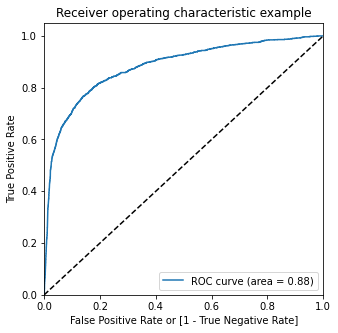

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( df_train_y1_pred_final.Churn, df_train_y1_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(df_train_y1_pred_final.Churn, df_train_y1_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point

In [121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    df_train_y1_pred_final[i]= df_train_y1_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
df_train_y1_pred_final.head(10)

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.17,0,1,1,0,0,0,0,0,0,0,0
1,0,0.17,0,1,1,0,0,0,0,0,0,0,0
2,0,0.01,0,1,0,0,0,0,0,0,0,0,0
3,0,0.00,0,1,0,0,0,0,0,0,0,0,0
4,0,0.01,0,1,0,0,0,0,0,0,0,0,0
5,0,0.01,0,1,0,0,0,0,0,0,0,0,0
6,0,0.13,0,1,1,0,0,0,0,0,0,0,0
7,0,0.03,0,1,0,0,0,0,0,0,0,0,0
8,0,0.05,0,1,0,0,0,0,0,0,0,0,0
9,0,0.01,0,1,0,0,0,0,0,0,0,0,0


In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(df_train_y1_pred_final.Churn, df_train_y1_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.08   1.00   0.00
0.10  0.10      0.82   0.80   0.83
0.20  0.20      0.90   0.67   0.92
0.30  0.30      0.92   0.60   0.95
0.40  0.40      0.94   0.52   0.97
0.50  0.50      0.93   0.16   0.99
0.60  0.60      0.92   0.06   1.00
0.70  0.70      0.92   0.02   1.00
0.80  0.80      0.92   0.01   1.00
0.90  0.90      0.92   0.01   1.00


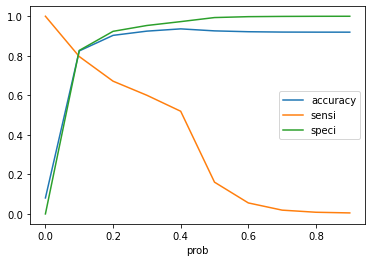

In [123]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### form the above we can get 80% accuracy with 0.1 probability cut-off which is balanced cut-off
and since we need true positives more accuratly as company don't want to loose high-value customers

In [124]:
# Building final model with 0.1 as cut off

In [125]:
# finla columns
cols

['onnet_mou_8',
 'loc_og_mou_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_7',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'night_pck_user_8',
 'sachet_2g_8']

In [126]:
# building final model

df_train_X1_sm = sm.add_constant(df_train_X1[cols])
    
final_lr1 = sm.GLM(df_train_y1, df_train_X1_sm, family = sm.families.Binomial())

res = final_lr1.fit()

# printing summary
print("summary")
print(res.summary())

df_train_y1_pred = res.predict(df_train_X1_sm).values.reshape(-1)

# creating df with actual and predicted values
df_train_y1_pred_final = pd.DataFrame({'Churn':df_train_y1, 'Churn_Prob':df_train_y1_pred})
df_train_y1_pred_final['predicted'] = df_train_y1_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)


summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    22009
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4232.1
Date:                Thu, 01 Jul 2021   Deviance:                       8464.2
Time:                        02:46:19   Pearson chi2:                 5.44e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.205

In [127]:
 # printing confusion matrix for final model
confusion = metrics.confusion_matrix(df_train_y1_pred_final.Churn, df_train_y1_pred_final.predicted )

print("confusion matrix")
print(confusion)

# check the overall accuracy.
print("accuracy")
print(metrics.accuracy_score(df_train_y1_pred_final.Churn, df_train_y1_pred_final.predicted))


confusion matrix
[[16738  3502]
 [  363  1418]]
accuracy
0.8244857181781027


#### so our final model is having 83% accuracy

### Deriving important predictors

In [128]:
# based on the summary and coefficients,
# we can see the below features are the most important features in the specified order
print("""
positive predictors:

    total_ic_mou_7,
    onnet_mou_8,
    
negative predictors:

    loc_ic_mou_8,
    spl_ic_mou_8
     """)




positive predictors:

    total_ic_mou_7,
    onnet_mou_8,
    
negative predictors:

    loc_ic_mou_8,
    spl_ic_mou_8
     


# Building model for predictions

## Dimensionality reduction using PCA

#### PCA

In [129]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [130]:
pca = PCA(random_state=42)

In [131]:
pca.fit(df_train_X1)

PCA(random_state=42)

In [132]:
pca.components_

array([[-4.70169342e-19, -1.11022302e-16, -2.22044605e-16, ...,
         8.06453195e-02,  8.68353782e-02,  1.01354746e-01],
       [-4.31509260e-19,  1.66533454e-16, -1.11022302e-16, ...,
         6.15999873e-02,  6.49690846e-02,  7.65472837e-02],
       [ 6.65536475e-19, -1.11022302e-16, -1.28369537e-16, ...,
         7.84114002e-02,  9.34236575e-02,  1.04313228e-01],
       ...,
       [ 0.00000000e+00, -6.73577846e-02, -1.49894017e-01, ...,
         2.70994137e-01,  7.03692471e-02, -1.20966019e-01],
       [ 9.99999218e-01, -1.08977733e-03, -2.23358352e-04, ...,
         8.04378684e-05, -8.04100204e-05,  6.43558243e-05],
       [-0.00000000e+00,  6.32201983e-02,  9.06574239e-02, ...,
        -2.83193852e-02, -1.50173658e-01,  4.38038775e-02]])

In [133]:
pca.explained_variance_ratio_

array([1.32902628e-01, 1.04150938e-01, 6.72977788e-02, 5.77798463e-02,
       3.62951140e-02, 2.89449062e-02, 2.84781954e-02, 2.47074610e-02,
       2.39660510e-02, 2.10044596e-02, 1.86087369e-02, 1.79741650e-02,
       1.77436166e-02, 1.70098898e-02, 1.61312417e-02, 1.55628152e-02,
       1.50443281e-02, 1.40568597e-02, 1.30111932e-02, 1.16801627e-02,
       1.12593429e-02, 1.01621782e-02, 9.70580298e-03, 9.36271699e-03,
       9.22268963e-03, 9.04641142e-03, 8.65956123e-03, 8.15471671e-03,
       7.68660796e-03, 7.46822473e-03, 7.31942451e-03, 6.83766255e-03,
       6.65812634e-03, 6.46081496e-03, 6.41974444e-03, 6.20929701e-03,
       5.84862456e-03, 5.78656189e-03, 5.72587881e-03, 5.68668344e-03,
       5.53511817e-03, 5.28497444e-03, 5.20885237e-03, 5.11753691e-03,
       4.92552906e-03, 4.77033695e-03, 4.65802095e-03, 4.35111185e-03,
       4.33002077e-03, 4.27043295e-03, 4.06735764e-03, 4.00543162e-03,
       3.72504455e-03, 3.69125999e-03, 3.53808303e-03, 3.42484248e-03,
      

<BarContainer object of 165 artists>

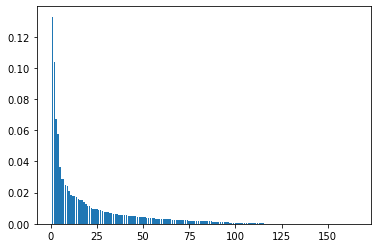

In [134]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

#### scree plot

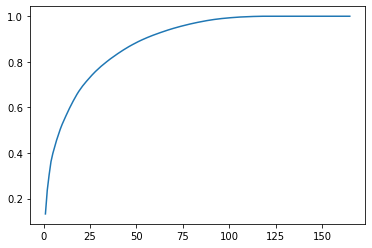

In [135]:
# scree plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [136]:
# as we can see 90% of data is captured using around 60 features

##### creating PCA with 90% of variance

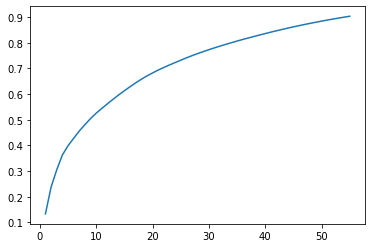

In [137]:
final_pca = PCA(0.90,random_state=42)
final_pca.fit(df_train_X1)

# scree plot
var_cumu = np.cumsum(final_pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [138]:
tele_final_array_train = final_pca.transform(df_train_X1)
tele_final_array_test = final_pca.transform(df_test_X1)

In [139]:
tele_final_X_train = pd.DataFrame(tele_final_array_train)
tele_final_X_test = pd.DataFrame(tele_final_array_test)

In [140]:
tele_final_cols = tele_final_X_train.columns

In [141]:
print(tele_final_X_train.shape)
print(tele_final_X_test.shape)

(22021, 55)
(5506, 55)


In [142]:
tele_final_X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,-4.36,-3.14,3.13,-1.39,-1.44,-2.97,2.87,-0.22,0.59,-1.36,-1.07,0.32,-0.34,0.22,-0.59,-0.44,-0.45,0.11,-0.96,0.05,-0.59,-0.14,0.63,-0.63,-0.44,-0.19,0.26,-0.16,-0.09,0.30,-0.45,0.71,0.27,0.63,-0.08,0.27,-0.19,0.05,-0.04,0.01,0.04,0.03,-0.53,0.06,-0.32,0.46,0.33,-0.43,0.15,-0.25,0.22,0.55,0.02,-0.01,0.05
1,3.84,-3.58,-1.07,-2.40,0.18,-1.48,-1.63,1.29,-0.37,0.41,0.25,1.01,0.23,-0.64,1.21,-0.43,-1.30,0.20,-0.14,-0.04,0.01,0.16,-0.12,-0.01,-0.02,-0.05,0.55,0.00,-0.00,0.30,-0.10,0.42,0.13,0.26,0.43,-0.38,-0.19,0.68,0.37,0.60,0.80,0.05,-0.63,-0.08,1.14,-0.10,0.17,-0.32,-0.63,0.09,-0.76,0.02,0.34,0.02,-0.32
2,-3.47,0.66,-2.58,-1.32,-2.43,0.54,-1.01,-1.66,0.85,0.28,1.46,-0.18,-1.33,0.00,-0.52,1.01,-1.24,0.72,0.94,0.12,-0.00,0.40,0.72,-0.05,-0.00,-0.81,-0.30,-0.53,-0.21,0.47,0.13,0.23,0.07,0.49,-0.41,0.12,0.07,-0.07,0.48,-0.06,-0.61,-1.29,0.60,0.19,-0.03,-0.19,0.07,0.52,-0.02,0.17,0.14,0.03,-0.02,-0.52,-0.04
3,2.48,3.48,-0.35,0.71,0.72,0.71,0.09,4.39,-1.81,-0.08,-0.63,-1.06,0.67,-1.63,2.12,0.27,-1.52,-0.19,0.54,1.15,-2.66,0.99,0.29,-0.66,0.66,-0.06,0.59,0.12,-0.14,-0.43,0.74,0.91,1.13,1.74,-0.73,0.33,0.76,0.04,-0.07,-0.16,-1.58,-0.11,1.05,-0.10,0.57,-0.21,-0.70,-0.68,-1.98,0.26,2.25,-0.76,-0.38,-0.45,-0.73
4,5.97,-1.20,1.36,-4.05,-0.38,-0.58,-0.65,0.39,-1.34,0.37,0.60,-0.30,-0.33,0.26,-0.54,-0.11,0.54,-0.01,0.08,-0.95,1.54,0.05,-0.08,0.42,-0.39,0.88,0.18,0.27,-0.84,0.09,-1.40,-0.67,0.50,-0.21,0.87,1.13,-2.32,0.14,-0.28,1.39,-1.66,0.41,0.50,-0.45,0.82,0.98,0.85,0.09,0.09,-0.16,-0.50,-0.03,-0.28,-0.09,-0.17


In [143]:
tele_final_X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,-0.65,-0.25,3.31,-0.62,3.89,1.89,-3.53,4.35,-0.81,-0.02,0.97,2.69,-0.61,-1.15,1.17,-2.33,0.49,0.68,-0.26,1.11,-1.39,0.19,-1.03,-1.81,0.52,0.98,0.10,1.80,-0.69,-0.46,1.20,-0.51,0.04,0.25,-0.45,-0.23,-0.24,-0.19,-0.04,-0.45,0.21,-0.27,-0.97,0.16,0.52,0.19,0.20,1.46,0.24,0.38,-0.09,-0.01,0.30,-1.12,0.15
1,4.11,-3.28,-1.81,-1.51,0.57,-2.30,-2.26,2.10,-0.46,0.58,-0.31,0.48,-0.21,0.12,0.08,-0.76,-0.80,0.48,0.01,0.60,-0.88,0.04,-0.61,0.23,-0.50,-0.13,-0.05,0.11,-0.21,0.22,-0.12,0.15,0.21,-0.14,-0.18,-0.15,-0.22,-0.01,0.27,0.14,0.82,0.12,-0.56,0.08,0.23,0.20,-0.04,-0.30,-0.57,0.10,0.40,-0.26,0.21,0.11,-0.13
2,-1.32,-3.77,-1.47,-3.17,-1.08,0.88,0.42,-1.42,0.08,0.29,0.48,0.36,-0.61,0.47,-0.34,0.22,-0.12,-0.05,-0.10,0.63,-0.04,-0.65,0.43,0.44,-0.44,-0.23,-0.72,-0.05,-0.04,-0.20,0.00,-0.00,-0.25,0.49,-0.14,-0.10,-0.07,-0.03,-0.05,0.02,0.26,0.27,-0.23,-0.07,0.06,-0.76,-0.20,0.04,0.33,0.04,0.11,0.24,-0.23,-0.23,-0.33
3,5.32,-1.96,0.18,0.13,1.12,-5.15,-5.86,2.54,-1.15,1.36,-0.16,0.09,0.69,0.24,-1.17,-1.66,-0.74,1.97,2.41,4.03,-3.30,-1.00,-0.57,0.96,-0.98,-0.63,-1.73,-0.26,-0.64,0.37,0.05,-0.83,1.70,1.55,-1.89,0.87,0.34,0.21,-1.57,1.43,-0.14,0.66,-0.61,-0.08,0.21,0.63,0.03,-0.82,-0.99,-0.04,1.05,-0.61,0.47,0.35,-0.14
4,-4.85,-3.26,3.64,-0.03,-1.52,5.08,-0.44,1.70,-1.40,0.53,-1.14,2.74,0.94,-0.33,-0.60,-2.70,1.17,0.06,0.94,1.27,0.85,0.06,-0.68,0.35,0.38,-1.10,-0.64,1.17,1.23,-0.44,0.93,-0.50,0.20,-0.03,-0.65,0.17,0.20,1.21,1.12,-1.10,-1.10,0.49,0.00,0.23,0.94,-0.05,0.19,2.63,-0.39,0.91,0.36,0.27,0.01,0.54,0.70


In [144]:
tele_final_y_train = pd.DataFrame(df_train_y1)
tele_final_y_test = pd.DataFrame(df_test_y1)

In [145]:
tele_final_y_train.value_counts()

0    20240
1     1781
dtype: int64

In [146]:
tele_final_y_test.value_counts()

0    5061
1     445
dtype: int64

##### Building Logistic regression model with PCA features

In [147]:
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21965
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4075.6
Date:                Thu, 01 Jul 2021   Deviance:                       8151.1
Time:                        02:46:47   Pearson chi2:                 1.61e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0417      0.066    -61.426 

In [148]:
tele_final_cols = list(tele_final_cols)
tele_final_cols.remove(50)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21966
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4075.6
Date:                Thu, 01 Jul 2021   Deviance:                       8151.2
Time:                        02:46:56   Pearson chi2:                 1.60e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0420      0.066    -61.447 

In [149]:
tele_final_cols.remove(44)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21967
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4075.6
Date:                Thu, 01 Jul 2021   Deviance:                       8151.3
Time:                        02:46:58   Pearson chi2:                 1.60e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0410      0.066    -61.596 

In [150]:
tele_final_cols.remove(48)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21968
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4075.8
Date:                Thu, 01 Jul 2021   Deviance:                       8151.5
Time:                        02:46:59   Pearson chi2:                 1.60e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0418      0.066    -61.610 

In [151]:
tele_final_cols.remove(43)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21969
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4075.8
Date:                Thu, 01 Jul 2021   Deviance:                       8151.7
Time:                        02:47:00   Pearson chi2:                 1.59e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0408      0.066    -61.629 

In [152]:
tele_final_cols.remove(0)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21970
Model Family:                Binomial   Df Model:                           50
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4076.0
Date:                Thu, 01 Jul 2021   Deviance:                       8152.0
Time:                        02:47:01   Pearson chi2:                 1.54e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0376      0.065    -61.933 

In [153]:
tele_final_cols.remove(13)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21971
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4076.2
Date:                Thu, 01 Jul 2021   Deviance:                       8152.3
Time:                        02:47:02   Pearson chi2:                 1.54e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0375      0.065    -61.938 

In [154]:
tele_final_cols.remove(46)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21972
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4076.4
Date:                Thu, 01 Jul 2021   Deviance:                       8152.7
Time:                        02:47:03   Pearson chi2:                 1.55e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0378      0.065    -61.971 

In [155]:
tele_final_cols.remove(53)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21973
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4076.5
Date:                Thu, 01 Jul 2021   Deviance:                       8153.1
Time:                        02:47:04   Pearson chi2:                 1.59e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0385      0.065    -61.958 

In [156]:
tele_final_cols.remove(7)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21974
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4077.0
Date:                Thu, 01 Jul 2021   Deviance:                       8154.1
Time:                        02:47:05   Pearson chi2:                 1.54e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0405      0.065    -62.050 

In [157]:
tele_final_cols.remove(22)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21975
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4077.6
Date:                Thu, 01 Jul 2021   Deviance:                       8155.2
Time:                        02:47:06   Pearson chi2:                 1.57e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0418      0.065    -62.036 

In [158]:
tele_final_cols.remove(30)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21976
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4078.7
Date:                Thu, 01 Jul 2021   Deviance:                       8157.4
Time:                        02:47:07   Pearson chi2:                 1.50e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0322      0.064    -62.592 

In [159]:
tele_final_cols.remove(17)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21977
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4079.8
Date:                Thu, 01 Jul 2021   Deviance:                       8159.7
Time:                        02:47:08   Pearson chi2:                 1.42e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0328      0.064    -62.572 

In [160]:
tele_final_cols.remove(16)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21978
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4081.4
Date:                Thu, 01 Jul 2021   Deviance:                       8162.7
Time:                        02:47:09   Pearson chi2:                 1.40e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0352      0.065    -62.500 

In [161]:
tele_final_cols.remove(49)
lrModel(tele_final_X_train, list(tele_final_y_train[0]), tele_final_cols)

summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21979
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4083.0
Date:                Thu, 01 Jul 2021   Deviance:                       8166.1
Time:                        02:47:10   Pearson chi2:                 1.46e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0309      0.064    -62.617 

In [162]:
createVIF(tele_final_X_train, tele_final_cols)

,Features,VIF
0,1,1.00
21,27,1.00
23,29,1.00
24,31,1.00
25,32,1.00
26,33,1.00
27,34,1.00
28,35,1.00
29,36,1.00
30,37,1.00


#### as we can see the features remained are with p values <0.05 and vif is 1.

In [163]:
nn_cols = tele_final_X_test.drop(tele_final_cols, axis=1)

tele_final_X_train.drop(nn_cols.columns, axis=1, inplace=True)
tele_final_X_test.drop(nn_cols.columns, axis=1, inplace=True)

In [164]:
# final cutoff = 0.1
cutoff = 0.1

In [165]:
tele_final_X_train_sm = sm.add_constant(tele_final_X_train)
    
final_lr2 = sm.GLM(list(tele_final_y_train[0]), tele_final_X_train_sm, family = sm.families.Binomial())

res = final_lr2.fit()

In [166]:
tele_final_y_train_pred = res.predict(tele_final_X_train_sm).values.reshape(-1)

# creating df with actual and predicted values
tele_final_y_train_pred_final = pd.DataFrame({'Churn':tele_final_y_train[0], 'Churn_Prob':tele_final_y_train_pred})
tele_final_y_train_pred_final['predicted'] = tele_final_y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > cutoff else 0)


In [167]:
# printing summary
print("summary")
print(res.summary())

# printing confusion matrix
confusion = metrics.confusion_matrix(tele_final_y_train_pred_final.Churn, tele_final_y_train_pred_final.predicted )

print("confusion matrix")
print(confusion)

# check the overall accuracy.
print("accuracy")
print(metrics.accuracy_score(tele_final_y_train_pred_final.Churn, tele_final_y_train_pred_final.predicted))


summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                22021
Model:                            GLM   Df Residuals:                    21979
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4083.0
Date:                Thu, 01 Jul 2021   Deviance:                       8166.1
Time:                        02:47:20   Pearson chi2:                 1.46e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0309      0.064    -62.617 

### our final model train accuracy is 84%

## Making predictions

In [168]:
tele_final_X_test_sm = sm.add_constant(tele_final_X_test)

In [169]:
tele_final_y_test_pred = res.predict(tele_final_X_test_sm).values.reshape(-1)

# creating df with actual and predicted values
tele_final_y_test_pred_final = pd.DataFrame({'Churn':tele_final_y_test[0], 'Churn_Prob':tele_final_y_test_pred})
tele_final_y_test_pred_final['predicted'] = tele_final_y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > cutoff else 0)


In [170]:
# Let's check the overall test accuracy.
metrics.accuracy_score(tele_final_y_test_pred_final.Churn, tele_final_y_test_pred_final.predicted)

0.8448964765710134

In [171]:
confusion2 = metrics.confusion_matrix(tele_final_y_test_pred_final.Churn, tele_final_y_test_pred_final.predicted )
confusion2

array([[4285,  776],
       [  78,  367]], dtype=int64)

In [172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8247191011235955

In [174]:
# Let us calculate specificity
TN / float(TN+FP)

0.8466706184548508

## As we can see our final model has test accuracy of 85% and train accuracy of 84%

## Also, our model is designed to predict true positives
## i.e., sensitivity ~= 83%